<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [3]:
# type your code here
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [4]:
# type your code here
ml=pd.read_csv("malaria.csv")
ml.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

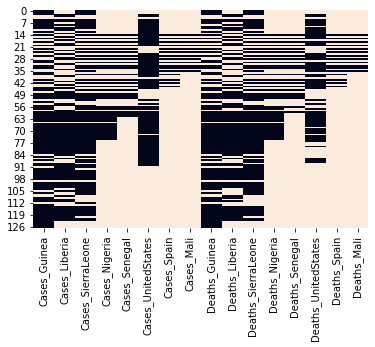

In [11]:
sns.heatmap(ml.isnull(), cbar=False)

In [10]:
ml.isnull()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
1,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
2,False,False,False,True,True,False,True,True,False,False,False,True,True,False,True,True
3,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
123,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
124,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
125,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True


In [7]:
ml.describe()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
count,93.000000,83.000000,87.000000,38.000000,25.00,73.000000,16.0,12.000000,92.000000,81.000000,87.000000,38.000000,22.0,57.000000,16.000000,12.000000
mean,911.064516,2335.337349,2427.367816,16.736842,1.08,14.068493,1.0,3.500000,563.239130,1101.209877,693.701149,6.131579,0.0,8.789474,0.187500,3.166667
std,849.108801,2987.966721,3184.803996,5.998577,0.40,7.769829,0.0,2.746899,508.511345,1297.208568,869.947073,2.781901,0.0,6.651361,0.403113,2.405801
min,49.000000,3.000000,0.000000,0.000000,1.00,1.000000,1.0,1.000000,29.000000,2.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
25%,236.000000,25.500000,64.500000,15.000000,1.00,8.000000,1.0,1.000000,157.750000,12.000000,6.000000,4.000000,0.0,4.000000,0.000000,1.000000
50%,495.000000,516.000000,783.000000,20.000000,1.00,13.000000,1.0,2.500000,360.500000,294.000000,334.000000,8.000000,0.0,7.000000,0.000000,2.000000
75%,1519.000000,4162.500000,3801.000000,20.000000,1.00,20.000000,1.0,6.250000,847.750000,2413.000000,1176.000000,8.000000,0.0,12.000000,0.000000,6.000000
max,2776.000000,8166.000000,10030.000000,22.000000,3.00,34.000000,1.0,7.000000,1786.000000,3496.000000,2977.000000,8.000000,0.0,30.000000,1.000000,6.000000


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

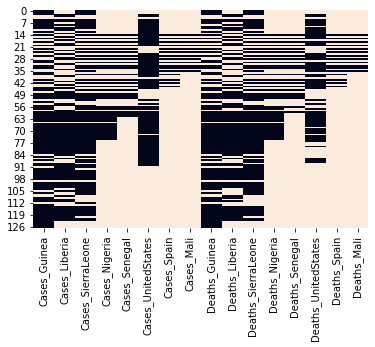

In [35]:
# type your code here

sns.heatmap(ml.isnull(), cbar=False)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
ser1=((ml.isnull().sum()/ml.shape[0])*100)
ser1

Cases_Guinea           26.771654
Cases_Liberia          34.645669
Cases_SierraLeone      31.496063
Cases_Nigeria          70.078740
Cases_Senegal          80.314961
Cases_UnitedStates     42.519685
Cases_Spain            87.401575
Cases_Mali             90.551181
Deaths_Guinea          27.559055
Deaths_Liberia         36.220472
Deaths_SierraLeone     31.496063
Deaths_Nigeria         70.078740
Deaths_Senegal         82.677165
Deaths_UnitedStates    55.118110
Deaths_Spain           87.401575
Deaths_Mali            90.551181
dtype: float64

In [33]:
ser1.sort_values(ascending=False)

Cases_Mali             90.551181
Deaths_Mali            90.551181
Cases_Spain            87.401575
Deaths_Spain           87.401575
Deaths_Senegal         82.677165
Cases_Senegal          80.314961
Cases_Nigeria          70.078740
Deaths_Nigeria         70.078740
Deaths_UnitedStates    55.118110
Cases_UnitedStates     42.519685
Deaths_Liberia         36.220472
Cases_Liberia          34.645669
Cases_SierraLeone      31.496063
Deaths_SierraLeone     31.496063
Deaths_Guinea          27.559055
Cases_Guinea           26.771654
dtype: float64

In [40]:
ser1[ser1>60].sort_values(ascending=False)

Cases_Mali        90.551181
Deaths_Mali       90.551181
Cases_Spain       87.401575
Deaths_Spain      87.401575
Deaths_Senegal    82.677165
Cases_Senegal     80.314961
Cases_Nigeria     70.078740
Deaths_Nigeria    70.078740
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
ml.columns

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Nigeria',
       'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [36]:
ser1.sort_values(ascending=False)

Cases_Mali             90.551181
Deaths_Mali            90.551181
Cases_Spain            87.401575
Deaths_Spain           87.401575
Deaths_Senegal         82.677165
Cases_Senegal          80.314961
Cases_Nigeria          70.078740
Deaths_Nigeria         70.078740
Deaths_UnitedStates    55.118110
Cases_UnitedStates     42.519685
Deaths_Liberia         36.220472
Cases_Liberia          34.645669
Cases_SierraLeone      31.496063
Deaths_SierraLeone     31.496063
Deaths_Guinea          27.559055
Cases_Guinea           26.771654
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

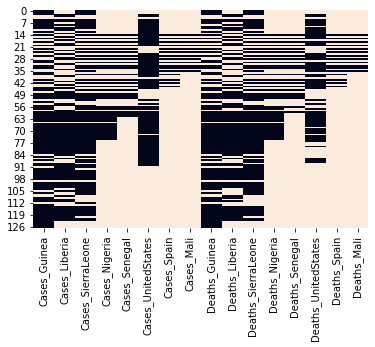

In [37]:
# type your code here
sns.heatmap(ml.isnull(), cbar=False)

<AxesSubplot:>

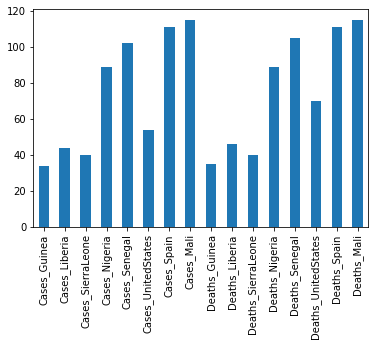

In [41]:
ml.isnull().sum().plot(kind='bar')

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
# type your code here
ml[ml.count(axis=1)>2]

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,83.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
119,122.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,80.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
120,112.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
121,112.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,70.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


In [51]:
ml.count(axis=1)

0      4
1      4
2      8
3      4
4      0
      ..
122    6
123    2
124    2
125    2
126    2
Length: 127, dtype: int64

In [57]:
ml[ml.isnull().sum(axis=1)<14]

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,83.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
119,122.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,80.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
120,112.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
121,112.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,70.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
# type your code here
ml['Cases_Liberia'].isnull().sum()

44

<AxesSubplot:>

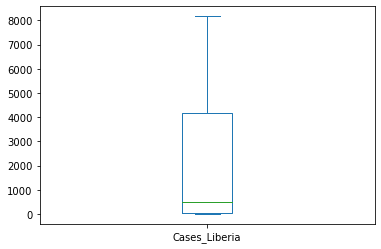

In [64]:
ml['Cases_Liberia'].plot(kind='box')

In [65]:
ml['Cases_Liberia'].mean()

2335.3373493975905

In [66]:
ml['Cases_Liberia'].median()

516.0

In [69]:
ml['Cases_Liberia'].replace(np.NAN,ml['Cases_Liberia'].mean(),inplace=True)

In [70]:
ml['Cases_Liberia'].isnull().sum()

0

In [71]:
ml['Cases_Liberia']

0      2335.337349
1      2335.337349
2      8166.000000
3      8157.000000
4      2335.337349
          ...     
122       8.000000
123    2335.337349
124    2335.337349
125    2335.337349
126    2335.337349
Name: Cases_Liberia, Length: 127, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
# type your code here
ml['Cases_UnitedStates'].isnull().sum()

54

<AxesSubplot:>

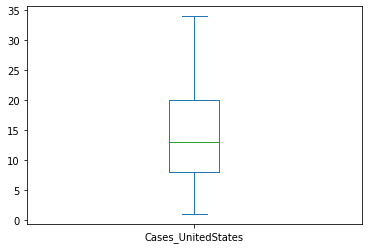

In [73]:
ml['Cases_UnitedStates'].plot(kind='box')

In [74]:
ml['Cases_UnitedStates'].replace(np.NAN,ml['Cases_UnitedStates'].mean(),inplace=True)

In [75]:
ml['Cases_UnitedStates'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [76]:
# type your code here
ml['Cases_Guinea'].isnull().sum()

34

<AxesSubplot:>

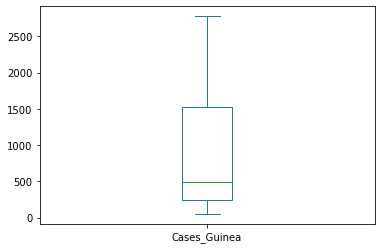

In [77]:
ml['Cases_Guinea'].plot(kind='box')

In [78]:
ml['Cases_Guinea'].replace(np.NAN,ml['Cases_Guinea'].mean(),inplace=True)

In [79]:
ml['Cases_Guinea'].isnull().sum()

0

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [81]:
hd=pd.read_csv("house.csv")
hd.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [82]:
# type your code here
hd.dtypes

Rooms           int64
Type           object
Price           int64
Method         object
Regionname     object
Bathroom        int64
Car             int64
Landsize        int64
Distance      float64
Bedroom         int64
dtype: object

<AxesSubplot:>

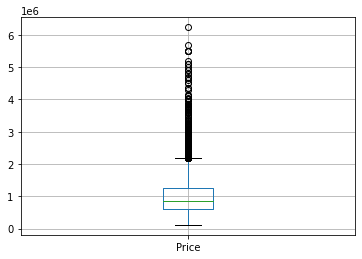

In [85]:
hd[['Price']].boxplot()

<AxesSubplot:>

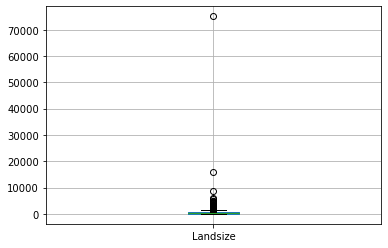

In [86]:
hd[['Landsize']].boxplot()

<AxesSubplot:>

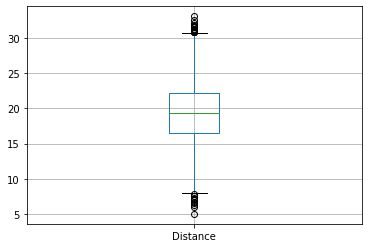

In [87]:
hd[['Distance']].boxplot()

In [ ]:
# ignore categorical values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [89]:
# type your code here
hd[['Car']].value_counts()

Car
1      2035
2      1942
0       331
3       252
4       171
5        20
6        12
7         1
8         1
26        1
dtype: int64

<AxesSubplot:>

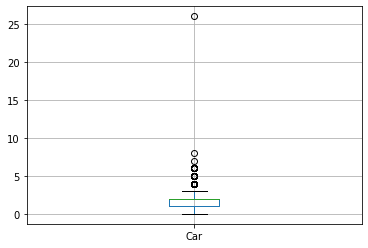

In [90]:
hd[['Car']].boxplot()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\DIVYANSHU RAJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Price'>

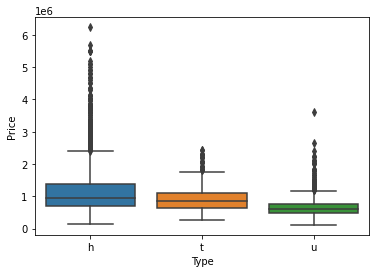

In [91]:
# type your code here

sns.boxplot(hd['Type'],hd['Price'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

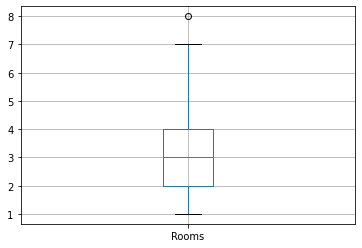

In [92]:
# type your code here
hd[['Rooms']].boxplot()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

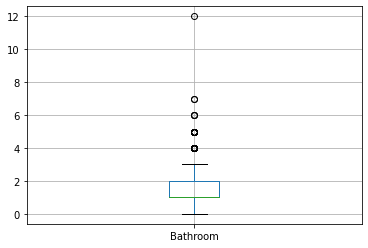

In [94]:
# type your code here
hd[['Bathroom']].boxplot() # Zscore or IQR

<AxesSubplot:ylabel='Density'>

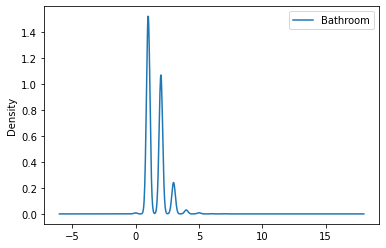

In [96]:
hd[['Bathroom']].plot(kind='density') #

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [98]:
# type your code here

q1=hd['Bedroom'].quantile(0.25)
q3=hd['Bedroom'].quantile(0.75)
iqr=q3-q1
hd[(hd['Bedroom']<(q1-1.5*iqr))|(hd['Bedroom']>(q3+1.5*iqr))]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30
4241,3,h,825000,S,Eastern Metropolitan,2,2,296,21.2,8
4249,3,t,750000,S,Western Metropolitan,2,0,311,22.1,8


In [100]:
from scipy import stats
z=np.abs(stats.zscore(hd['Bedroom']))
hd[z>3]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
130,3,h,900000,S,Eastern Metropolitan,1,1,180,21.3,7
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9
752,3,t,891000,S,Western Metropolitan,1,1,632,18.2,7
761,1,u,401000,S,Southern Metropolitan,1,2,624,20.6,7
891,4,h,1200000,S,Eastern Metropolitan,2,1,316,28.4,7
920,3,h,600000,S,Northern Metropolitan,2,1,281,23.2,7
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9
1816,3,h,1037000,S,Northern Metropolitan,1,1,820,18.7,7
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here